### imports

In [1]:
from neuralmonkey.classes.session import load_mult_session_helper
from pythonlib.tools.stroketools import strokesInterpolate2
import pythonlib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import random
import math
import os
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

### Session helper functions

In [3]:
################################################
### Extracting a Session's successful Trialcodes/Trialnums ###
################################################

# get a list of successful trialcodes
def getSuccessfulTrialCodes(sn):
    D = sn.Datasetbeh
    Dcopy = D.copy()
    Dcopy.preprocessGood(params=["one_to_one_beh_task_strokes"]) # prunes Dcopy to keep only successful trials
    
    return Dcopy.Dat['trialcode'].tolist()

# from the list of trialcodes, get matching list of NEURAL trials
def getNeuralTrialNumsFromTrialCodes(sn, trialcode_list):
    D = sn.Datasetbeh
    trials = []
    for tc in trialcode_list:
        # make sure there is exactly one matching trialcode
        #index_dataset = D.Dat[(D.Dat["trialcode"]==tc)].index
        #assert len(index_dataset)==1

        # pull out these datapoints from trial-level dataset
        t = sn.datasetbeh_trialcode_to_trial(tc)
        trials.append(t)
        #ons, offs = sn.strokes_extract_ons_offs(trialtdt)
    return trials

# get a list of successful trialnums
def getSuccessfulNeuralTrialNums(sn):
    trialcodes = getSuccessfulTrialCodes(sn)
    return getNeuralTrialNumsFromTrialCodes(sn, trialcodes)


################################################
### Extracting/Plotting Eye-Tracking Data ###
################################################

# returns smoothed and transformed x,y data for a session/trialnum
def getEyeXYSmoothedAndTransformed(sn, trialnum, PLOT=True):
    # get TRANSFORMED xy-coordinates (used calibration matrix to map to screen)
    st = sn.beh_extract_eye_good(trialnum)
    times = st[0]
    x_aff = st[1][:,0]
    y_aff = st[1][:,1]

    # SMOOTH DATA
    from pythonlib.tools.timeseriestools import smoothDat
    x_aff_sm = smoothDat(x_aff, window_len=10)
    y_aff_sm = smoothDat(y_aff, window_len=10)
    
    if PLOT==True:
        fig, axes = plt.subplots(2,1, figsize=(10, 10))
        # plot smoothed x-data
        axes[0].plot(times,x_aff_sm)
        # plot smoothed y-data
        axes[1].plot(times,y_aff_sm)
        return x_aff_sm, y_aff_sm, times, axes
    else:
        return x_aff_sm, y_aff_sm, times

# plot the (x,y) data over time for eye tracking data
def plotEyeTrackingTrace(times, x_vals, y_vals, ax, color="b"):
    ax.plot(x_vals, y_vals, "-k", alpha=0.3)
    ax.scatter(x_vals, y_vals, c=times, alpha=0.5, marker="o")   
    

# get the start, end times for the window spanned by start_event, end_event
def getTimeWindowOfEvents(sn, trial, start_event, end_event):
    # keep just times between [start_event, end_event]
    dict_event_times = sn.events_get_time_sorted(trial, list_events=(start_event, end_event))[0]
    start_time = dict_event_times[start_event]
    end_time = dict_event_times[end_event]
    
    return start_time, end_time


# return mask array of whether within bounding box
def getBoundingBoxMask(x, y, minx, miny, maxx, maxy):
    assert len(x) == len(y), "xy must be same length"
    xn = np.array(x)
    yn = np.array(y)

    result = ((xn >= minx) & (xn <= maxx) & (yn >= miny) & (yn <= maxy))
    #print(result)
    return result

## Part 1: generate Snippets and load in presaved data

Searching using this string:
/home/kgg/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/kgg/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
session:  0
Beh Sessions that exist on this date:  {230630: [(1, 'primsingridfixed6fDiego')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['primsingridfixed6fDiego']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/kgg/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/kgg/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
Searching using this string:
/home/kgg/mnt/Freiwald/kgupta/neural_data/*Diego*/*230630*/*Diego*230630**
Found this many paths:
1
---
/home/kgg/mnt/Freiwald/kgupta/neural_data/Diego/230630/Diego-230630-124955
These durations gotten for sessions...
...  _durations_each_sess_using_tank : [14115.359024]
...  onsets_using_rs4_each_rs : {2: 

added new column self.Dat[Task]
=== CLEANING UP self.Dat (_cleanup_reloading_saved_state) ===== 
- starting/ending len (grouping params):
648
0 _behclass_alignsim_compute
200 _behclass_alignsim_compute
400 _behclass_alignsim_compute
600 _behclass_alignsim_compute
Running D._behclass_tokens_extract_datsegs
0 _behclass_tokens_extract_datsegs
200 _behclass_tokens_extract_datsegs
400 _behclass_tokens_extract_datsegs
600 _behclass_tokens_extract_datsegs
stored in self.Dat[BehClass]
Removing these trials: 
[]
self.Dat starting legnth:  648
Modified self.Dat, keeping only the inputted inds
self.Dat final legnth:  648
ADded new column: supervision_online
Appended self.Dat[superv_SEQUENCE_SUP]
Appended self.Dat[superv_SEQUENCE_ALPHA]
Appended self.Dat[superv_COLOR_ON]
Appended self.Dat[superv_COLOR_ITEMS_FADE_TO_DEFAULT_BINSTR]
Appended self.Dat[superv_COLOR_METHOD]
Appended self.Dat[superv_GUIDEDYN_ON]
Appended self.Dat[superv_VISUALFB_METH]
appended col to self.Dat:
supervision_stage_new
Appe

1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307


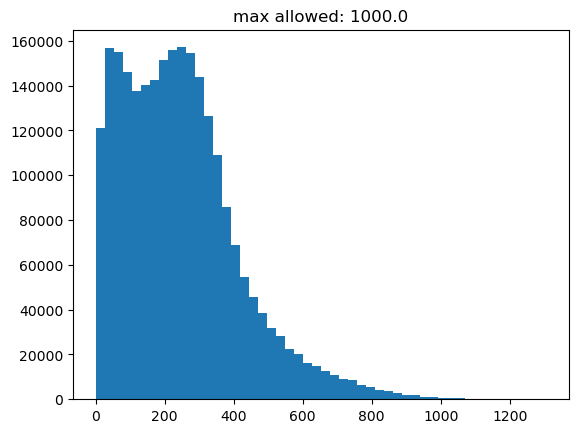

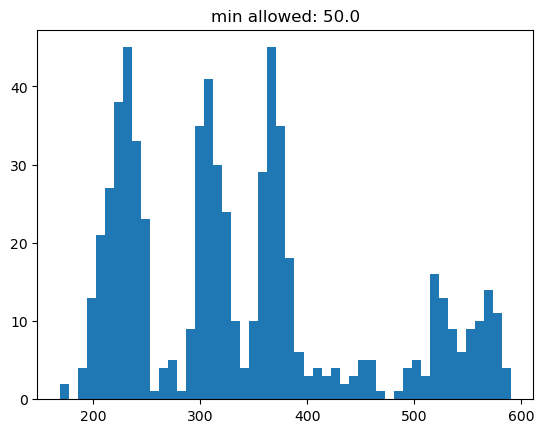

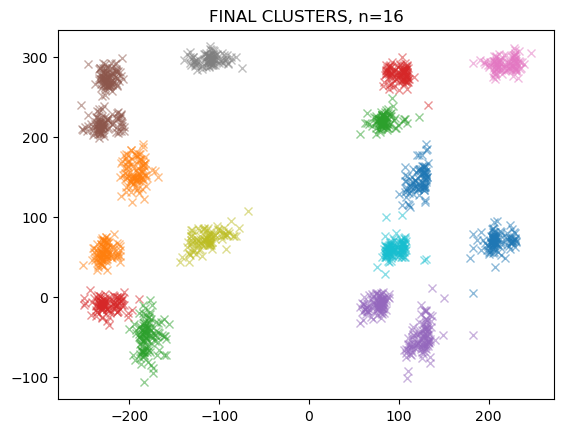

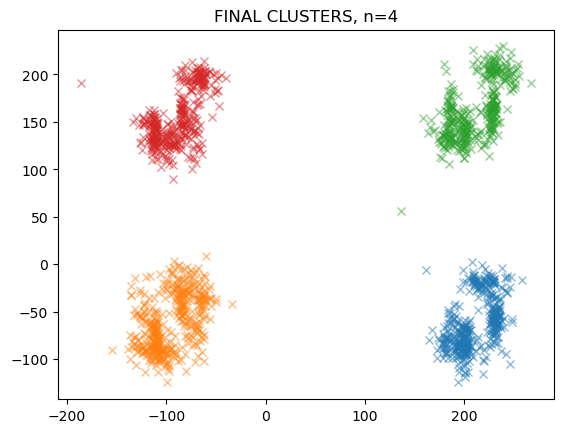

In [4]:
## LOAD IN SESSION ##

# preprocessed datasets: Diego-230603 (ok), Pancho-221020 (ok), Diego-230626 (primsingrid), Diego-230616 (26 singleprims)
date = 230630
animal = "Diego"
session = 0

# change to base dir
os.chdir("/home/kgg/Desktop/eyetracking_analyses/")

# mkdir for animal-date-session
dirn = animal + "-" + str(date) + "-" + str(session)
os.makedirs(dirn, exist_ok=True)
os.chdir(dirn)

# load session
MS = load_mult_session_helper(date, animal)
sn = MS.SessionsList[session]

In [5]:
success_neural_trials = getSuccessfulNeuralTrialNums(sn)
# store valid trialnums
neuraltnums = []
tcodes = []

# get bounding box
# - format: [[-x, -y], [+x, +y]]. does not save in self
#bounding_box = sn.Datasetbeh.recomputeSketchpadEdgesAll(strokes_ver="strokes_task")
#print(bounding_box)


# loop thru trials and save xy data
for ntrial in success_neural_trials:
    
#     # get sampling rate
#     t,v,fs_raw = sn.extract_data_tank_streams("eyex", ntrial, ploton=False)

#     # get XY smoothed / transformed on eye calibration matrix
#     x_raw,y_raw,times_raw = getEyeXYSmoothedAndTransformed(sn, ntrial, False)
    
#     # resample x, y, times using integer sampling rate
#     fs_new = 200
#     stroke_raw = [np.array([x_raw, y_raw, times_raw]).T] # dummy stroke list
#     stroke_intp = strokesInterpolate2(stroke_raw, ["fsnew", fs_new, fs_raw])
#     stroke_resampled = stroke_intp[0]
#     x_rs = stroke_resampled[:,0]
#     y_rs = stroke_resampled[:,1]
#     times_rs = stroke_resampled[:,2]

    # save neuraltnums, tcodes
    neuraltnums.append(ntrial)
    tcodes.append(sn.datasetbeh_trial_to_trialcode(ntrial))
    
    # save data to be loaded into MATLAB
    #fname = "ntrial" + str(ntrial) + ".mat"
    #scipy.io.savemat(fname, dict(x=x_rs, y=y_rs, times=times_rs, fs_hz=fs_new))


*** RUNNING D.preprocessGood using these params:
['one_to_one_beh_task_strokes']
-- Len of D, before applying this param: one_to_one_beh_task_strokes, ... 648
after: 600


# Part 3: extract Snippets with event "saccon" or "fixation-onset",and plot rasters etc.

In [6]:
from neuralmonkey.classes.snippets import Snippets, extraction_helper

# Turn on debug mode, this prunes sites and trials, so below runs faster
DEBUG = False
sn._DEBUG_PRUNE_SITES = DEBUG
sn._DEBUG_PRUNE_TRIALS = DEBUG

In [7]:
sn.PopAnalDict = {}

In [8]:
if DEBUG:
    # option1 - get first 5 trials, to test
    dataset_pruned_for_trial_analysis = sn.Datasetbeh.copy()
    dataset_pruned_for_trial_analysis.Dat = dataset_pruned_for_trial_analysis.Dat.iloc[0:5]
else:
    # option2 - get all trialcodes from tcodes
    dataset_pruned_for_trial_analysis = sn.Datasetbeh.copy()
    dataset_pruned_for_trial_analysis.Dat = dataset_pruned_for_trial_analysis.Dat[dataset_pruned_for_trial_analysis.Dat["trialcode"].isin(tcodes)].reset_index(drop=True)

In [9]:
# Main code for extracting Snippets (SP)

# # == MODIFY THESE:
list_events = ["fixon_preparation"] # each event defines a snippet
list_pre_dur = [-0.4]
list_post_dur = [0.4]

# == MODIFY THESE:
# list_events = ["go"] # each event defines a snippet
# list_pre_dur = [-0.5]
# list_post_dur = [0.5]

# == IGNORE THESE:
which_level = "flex"
list_features_extraction = []
list_features_get_conjunction = []
trials_prune_just_those_including_events=False
fail_if_times_outside_existing=False

SP = Snippets(sn,
    which_level,
    list_events,
    list_features_extraction,
    list_features_get_conjunction,
    list_pre_dur,
    list_post_dur,
    strokes_only_keep_single=False,
    tasks_only_keep_these=None,
    prune_feature_levels_min_n_trials=None,
    dataset_pruned_for_trial_analysis=dataset_pruned_for_trial_analysis,
    trials_prune_just_those_including_events=trials_prune_just_those_including_events,
    fr_which_version='sqrt',
    NEW_VERSION=True,
    SKIP_DATA_EXTRACTION=False,
    fail_if_times_outside_existing=fail_if_times_outside_existing
             )


 == extarcating these sites:  [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1438, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 11

In [10]:
savedir_pkl = f"/home/kgg/Desktop/eyetracking_analyses/{animal}-{date}"
SP.DfScalar = pd.read_pickle(savedir_pkl + "/sp_dfscalar.pkl")

### Plot and save rasters for each site

In [11]:
SP.DfScalar.columns

Index(['trialcode', 'chan', 'event_unique_name', 'event_aligned',
       'spike_times', 'trial_neural', 'event_time', 'idx_trialtime',
       'event_idx_within_trial', 'fixation-centroid', 'fr_sm', 'fr_sm_times',
       'event', 'fr_scalar_raw', 'fr_scalar', 'fr_sm_sqrt', 'session_idx',
       'session_neural', 'index_datapt', 'probe', 'task_kind', 'epoch_orig',
       'gridsize', 'INSTRUCTION_COLOR', 'FEAT_num_strokes_task', 'origin',
       'taskgroup', 'epoch', 'seqc_0_shape', 'superv_COLOR_METHOD', 'epochset',
       'character', 'donepos', 'FEAT_num_strokes_beh',
       'supervision_stage_concise', 'aborted', 'size_this_event', 'seqc_3_loc',
       'seqc_0_loc_on_clust', 'seqc_0_loc', 'seqc_2_loc_on_clust',
       'seqc_2_loc', 'seqc_1_shape', 'seqc_2_shape', 'seqc_1_loc',
       'seqc_3_loc_on_clust', 'seqc_3_shape', 'seqc_1_loc_on_clust',
       'between-stimonset-and-go', 'early-or-late-planning-period',
       'shape-fixation', 'loc-fixation', 'first-fixation-on-shape',
      

In [33]:
# make new dir for plots
sdir_rasters = "/home/kgg/Desktop/eyetracking_analyses/RASTERS"
os.makedirs(sdir_rasters +  f"/{animal}-{date}/rasters_all_sites_with_sm_SHAPE/shape-fixation", exist_ok=True)
os.chdir(sdir_rasters +  f"/{animal}-{date}/rasters_all_sites_with_sm_SHAPE/shape-fixation")

# to run all sites
all_sites = SP.DfScalar['chan'].unique()

from pythonlib.tools.plottools import savefig

for site in all_sites:
    fname = f"{sn.sitegetter_summarytext(site)}.png"
    fig, axes = SP.plotgood_rasters_smfr_each_level_combined(site, "shape-fixation",
                                                             ['loc-fixation', 'seqc_0_shape', 'early-or-late-planning-period', 'task_kind'],
                                                            "fixon_preparation")
    #fig, axes = SP.plotgood_rasters_smfr_combined(site)
    savefig(fig, fname)
    plt.close("all")

In [ ]:
# make new dir for plots
sdir_rasters = "/home/kgg/Desktop/eyetracking_analyses/RASTERS"
os.makedirs(sdir_rasters +  f"/{animal}-{date}/rasters_all_sites_with_sm_SHAPE/seqc_0_shape", exist_ok=True)
os.chdir(sdir_rasters +  f"/{animal}-{date}/rasters_all_sites_with_sm_SHAPE/seqc_0_shape")

# to run specific sites
pmv_m_sites = SP.sitegetter_map_region_to_sites('PMv_m', True)
pmv_l_sites = SP.sitegetter_map_region_to_sites('PMv_l', True)
vlpfc_a_sites = SP.sitegetter_map_region_to_sites('vlPFC_a', True)
vlpfc_p_sites = SP.sitegetter_map_region_to_sites('vlPFC_p', True)
m1_m_sites = SP.sitegetter_map_region_to_sites('M1_m', True)

sites = pmv_m_sites + pmv_l_sites + m1_m_sites + vlpfc_a_sites
sites = [s for s in sites if s in all_sites]

from pythonlib.tools.plottools import savefig

for site in sites:
    fname = f"{sn.sitegetter_summarytext(site)}.png"
    fig, axes = SP.plotgood_rasters_smfr_each_level_combined(site, "seqc_0_shape",
                                                             ['shape-fixation', 'seqc_0_loc', 'early-or-late-planning-period', 'task_kind'],
                                                            "fixon_preparation")
    #fig, axes = SP.plotgood_rasters_smfr_combined(site)
    savefig(fig, fname)
    plt.close("all")

In [40]:
# to run a specific site
area_sites = SP.sitegetter_map_region_to_sites('vlPFC_p', True)

sites = [s for s in area_sites if s in all_sites]

from pythonlib.tools.plottools import savefig

for site in sites:
    fname = f"{sn.sitegetter_summarytext(site)}.png"
    fig, axes = SP.plotgood_rasters_smfr_each_level_combined(site, "shape-fixation",
                                                             ['loc-fixation', 'seqc_0_shape', 'early-or-late-planning-period', 'task_kind'],
                                                            "fixon_preparation")
    #fig, axes = SP.plotgood_rasters_smfr_combined(site)
    savefig(fig, fname)
    plt.close("all")

### Modulation of activity by some variable of interest

In [32]:
# copying from 230627_v2

# First, append the variables that you wish to analyze
#SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP
#SP.DfScalar["dummy_var"] = "dummy"

if DEBUG:
    # if you debug, then you have small n trials, so lower the threshold for keeping data.
    print(SP.ParamsGlobals)
    SP.globals_update(globals_nmin=2)
    
# Run this to compute modulation
DF_VAR, DF_FR, DF_FR_LEVELS, list_eventwindow_event = SP.modulationgood_compute_wrapper("shape-fixation", 
                                                                                        ['task_kind', 'loc-fixation', 'seqc_0_shape', 'shape-macrosaccade-index'],
                                                                                        DEBUG_CONJUNCTIONS=False, 
                                                                                        THINGS_TO_EXTRACT=["anova"])

Running grouping_print_n_samples...
DOing these! ...
list_events ['00_fixon_preparation']
list_pre_dur [-0.4]
list_post_dur [0.4]
GOOD!, enough data, max n per grouping conjunction (nmin, nmax)  1 384
 
Updated ParamsGlobals for event 00_fixon_preparation to:
Updated self.ParamsGlobals:
n_min_trials_per_level  =  5
lenient_allow_data_if_has_n_levels  =  2
PRE_DUR_CALC  =  -0.4
POST_DUR_CALC  =  0.4
list_events  =  ['00_fixon_preparation']
list_pre_dur  =  [-0.4]
list_post_dur  =  [0.4]
DOING THIS EVENT:  00_fixon_preparation_-400_to_400
site : 1000
00_fixon_preparation
             trialcode  chan     event_unique_name      event_aligned  \
0           230630-1-1  1000  00_fixon_preparation  fixon_preparation   
1           230630-1-1  1001  00_fixon_preparation  fixon_preparation   
2           230630-1-1  1002  00_fixon_preparation  fixon_preparation   
3           230630-1-1  1004  00_fixon_preparation  fixon_preparation   
4           230630-1-1  1005  00_fixon_preparation  fixon_p

AssertionError: This event doesnt exist!!

In [ ]:
# Plot results and save
sdir_mod = f"/home/kgg/Desktop/eyetracking_analyses/MODULATION/{animal}-{date}"
SP.modulationgood_plot_WRAPPER(DF_VAR, DF_FR, DF_FR_LEVELS, list_eventwindow_event, 
                               var="shape-fixation", vars_conjuction=['task_kind', 'loc-fixation', 'seqc_0_shape', 'shape-macrosaccade-index'],
                               sdir_base=sdir_mod, N_WAYS=1)